In [2]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
driver = webdriver.Chrome("E://chromedriver") #location where I downloaded and extracted chromedriver

In [4]:
str1='https://timesofindia.indiatimes.com/viral-news?curpg='
x=[]
#Getting past viral news from The Times of India website
for i in range(1,15):
    driver.get(str1+str(i))
    content = driver.page_source
    soup = BeautifulSoup(content)
    data = soup.find(id='c_wdt_list_1')
    for link in data.find_all('a'):  
        x.append(link.get('href'))


In [5]:
#cleaning the data to get only headlines
cnews=[]
for i in range(len(x)):
    if(x[i][:11]=='/viral-news'):
        cnews.append(x[i].split('/')[2])
cnews=cnews[1::2]
cnews2=[]
for i in range(len(cnews)):
    l=cnews[i].split('-')
    cnews2.append(l)

In [6]:
#importing libararies for clustering of viral news headlines using word2vec and kmeans clustering algorithm
from gensim.models import Word2Vec
import nltk
import numpy as np
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

In [7]:
sentence=cnews2

In [8]:
#Training Word2vec on the viral news headlines and storing representaion of each word in the array X
m=Word2Vec(sentence,size=50,min_count=1,sg=1)
def vectorizer(sent,m):
    vec=[]
    nw=0
    for w in sent:
        try:
            if(nw==0):
                vec=m[w]
            else:
                vec=np.add(vec,m[w])
            nw+=1
        except:
            pass
    return np.asarray(vec)/nw
l=[]
for i in sentence:
    l.append(vectorizer(i,m))
X=np.array(l)

C:\Users\dhruu\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
C:\Users\dhruu\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


In [39]:
#An input headline which has to be predicted if it will get viral
test1='Year on, few Jet staff being paid'
test1=test1.split(' ')
#Getting the vector representation of this test input
x1=Word2Vec(test1,size=50,min_count=1,sg=1)
y1=vectorizer(test1,m)
test1=np.array(y1)

C:\Users\dhruu\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
C:\Users\dhruu\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


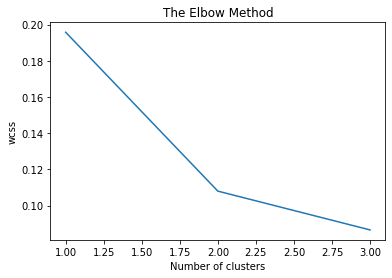

In [40]:
#Using elbow method for finding number of clusters
import matplotlib.pyplot as plt
%matplotlib inline
wcss=[]
for i in range(1,4):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=50)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,4),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [41]:
#Classifying each news headline into clusters
n_clusters=2
clf=KMeans(n_clusters=2,max_iter=300,init='k-means++',n_init=10,algorithm='full')
labels=clf.fit_predict(X)
print(labels)
for index,sent in enumerate(sentence):
    print(str(labels[index])+':'+str(sent))

[1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0
 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0
 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1
 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1
 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0
 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1
 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0
 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0
 1 0 0 0 1 1 1 1]
1:['in', 'times', 'of', 'lockdown', 'a', 'poem', 'asks', 'us', 'to', 'be', 'non', 'judgmental']
1:['this', 'jumbo', 'has', 'a', 'way', 'with', 'water', 'spri

In [42]:
test2=test1.reshape(1,-1)

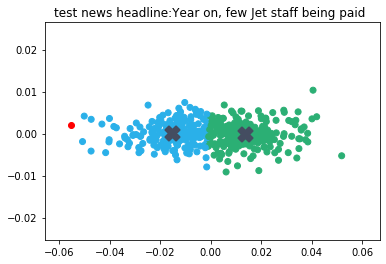

In [47]:
#plotting all the clusters and the cluster centroids
%matplotlib inline
pca=PCA(n_components=2).fit(X)
coords=pca.transform(X)
coordstest=pca.transform(test2)
label_colors=['#2AB0E9','#2BAF74']
colors=[label_colors[i] for i in labels]
plt.scatter(coords[:,0],coords[:,1],c=colors)
plt.scatter(coordstest1[:,0],coordstest[:,1],c='#FF0000')
centroids=clf.cluster_centers_
centroid_coords=pca.transform(centroids)
plt.scatter(centroid_coords[:,0],centroid_coords[:,1],marker='X',s=200,linewidths=2,c='#444d61')
plt.title('test news headline:Year on, few Jet staff being paid ')
plt.show()

In [48]:
#predicting the likelihood of the virality of test headline based on its position wrt cluster centroids
if(coordstest[0][0]<-0.05 and coordstest[0][0]>=-0.06 and coordstest[0][1]<-0.01 and coordstest[0][1]>=-0.02):
    result='Somewhat Unlikely(70-80% likely)'
elif(coordstest[0][0]<-0.05 and coordstest[0][0]>=-0.06 and coordstest[0][1]>0.01 and coordstest[0][1]<=0.02):
    result='Somewhat Unlikely(70-80% likely)'
elif(coordstest[0][0]<-0.06 and coordstest[0][0]>=-0.07):
     result='Unlikely(40-45% likely)'
elif(coordstest[0][0]<-0.07 or coordstest[0][0]>0.07 or coordstest[0][1]<-0.03 or coordstest[0][1]>0.03):
     result='Very Unlikely(less than 30% likely)'
elif(coordstest[0][0]>0.06 and coordstest[0][0]<=0.07):
     result='Unlikely(40-45% likely)'
elif(coordstest[0][0]<-0.05 and coordstest[0][0]>=-0.06 and coordstest[0][1]<-0.02):
    result='Unlikely(40-45% likely)' 
elif(coordstest[0][0]<-0.05 and coordstest[0][0]>=-0.06 and coordstest[0][1]>0.02):
    result='Unlikely(40-45% likely)' 
elif(coordstest[0][0]>0.05 and coordstest[0][0]<=0.06 and coordstest[0][1]<-0.02):
    result='Unlikely(40-45% likely)' 
elif(coordstest[0][0]>0.05 and coordstest[0][0]<=0.06 and coordstest[0][1]>0.02):
    result='Unlikely(40-45% likely)' 
elif(coordstest[0][0]>-0.05 and coordstest[0][0]<=0.05 and coordstest[0][1]<-0.02):
    result='Unlikely(40-45% likely)' 
elif(coordstest[0][0]>-0.05 and coordstest[0][0]<=0.05 and coordstest[0][1]>0.02):
    result='Unlikely(40-45% likely)' 
elif(coordstest[0][0]>-0.04 and coordstest[0][0]<=0.05 and coordstest[0][1]>-0.01 and coordstest[0][1]<0.01):
    result='Likely to get Viral (More than 81% likely)'

else:
    result='Very Unlikely(less than 30% likely)'


In [49]:
print(result)

Very Unlikely(less than 30% likely)
